In [92]:
import numpy as np
from qiskit.circuit.library import EfficientSU2
from qiskit.quantum_info import SparsePauliOp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from qiskit_aer import Aer
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.circuit.library import TwoLocal
from qiskit_aer.primitives import Estimator as AerEstimator
from scipy.optimize import minimize

In [93]:
hamiltonians_values = np.random.rand(4)
print("Hamiltonian values:", hamiltonians_values)

hamiltonian1 = SparsePauliOp.from_list(
    [("YZ", hamiltonians_values[0]), ("ZI", hamiltonians_values[1]), ("ZZ", hamiltonians_values[2]), ("XX", hamiltonians_values[3])]
)

hamiltonians_values = -np.random.rand(4)
print("Hamiltonian values:", hamiltonians_values)

hamiltonian2 = SparsePauliOp.from_list(
    [("YZ", hamiltonians_values[0]), ("ZI", hamiltonians_values[1]), ("ZZ", hamiltonians_values[2]), ("XX", hamiltonians_values[3])]
)

hamiltonians_values = 2*np.random.rand(4)
print("Hamiltonian values:", hamiltonians_values)

hamiltonian3 = SparsePauliOp.from_list(
    [("YZ", hamiltonians_values[0]), ("ZI", hamiltonians_values[1]), ("ZZ", hamiltonians_values[2]), ("XX", hamiltonians_values[3])]
)

hamiltonians_values = -2*np.random.rand(4)
print("Hamiltonian values:", hamiltonians_values)

hamiltonian4 = SparsePauliOp.from_list(
    [("YZ", hamiltonians_values[0]), ("ZI", hamiltonians_values[1]), ("ZZ", hamiltonians_values[2]), ("XX", hamiltonians_values[3])]
)

hamiltonians_values = 10*np.random.rand(4)
print("Hamiltonian values:", hamiltonians_values)

hamiltonian5 = SparsePauliOp.from_list(
    [("YZ", hamiltonians_values[0]), ("ZI", hamiltonians_values[1]), ("ZZ", hamiltonians_values[2]), ("XX", hamiltonians_values[3])]
)

Hamiltonian values: [0.08031913 0.6157051  0.2015935  0.59470747]
Hamiltonian values: [-0.49319476 -0.27085202 -0.63662214 -0.09162989]
Hamiltonian values: [0.75417276 0.48736823 0.19455461 1.00109074]
Hamiltonian values: [-0.08633863 -1.14244066 -0.58939657 -1.96929689]
Hamiltonian values: [5.80879878 8.17726563 5.93259995 2.53976923]


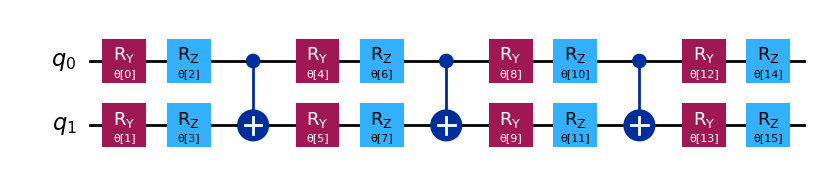

In [94]:
ansatz1 = EfficientSU2(hamiltonian1.num_qubits)
ansatz2 = EfficientSU2(hamiltonian2.num_qubits)
ansatz3 = EfficientSU2(hamiltonian3.num_qubits)
ansatz4 = EfficientSU2(hamiltonian4.num_qubits)
ansatz5 = EfficientSU2(hamiltonian5.num_qubits)
ansatz1.decompose().draw("mpl", style="iqp")

In [95]:
num_params = ansatz1.num_parameters
num_params

16

In [96]:
simulator = Aer.get_backend("aer_simulator")
target = simulator.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)
ansatz_isa1 = pm.run(ansatz1)
ansatz_isa2 = pm.run(ansatz2)
ansatz_isa3 = pm.run(ansatz3)
ansatz_isa4 = pm.run(ansatz4)
ansatz_isa5 = pm.run(ansatz5)

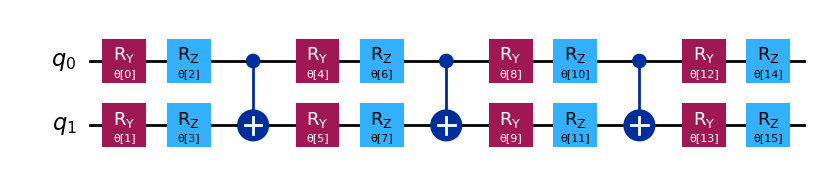

In [97]:
ansatz_isa1.draw(output="mpl", idle_wires=False, style="iqp")

In [118]:
hamiltonian_isa1 = hamiltonian1.apply_layout(layout=ansatz_isa1.layout)
hamiltonian_isa2 = hamiltonian2.apply_layout(layout=ansatz_isa2.layout)
hamiltonian_isa3 = hamiltonian3.apply_layout(layout=ansatz_isa3.layout)
hamiltonian_isa4 = hamiltonian4.apply_layout(layout=ansatz_isa4.layout)
hamiltonian_isa5 = hamiltonian5.apply_layout(layout=ansatz_isa5.layout)

def cost_func(params, ansatz, hamiltonian, estimator):

    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (EstimatorV2): Estimator primitive instance
        cost_history_dict: Dictionary for storing intermediate results

    Returns:
        float: Energy estimate
    """

    param_dict = dict(zip(ansatz.parameters, params))
    bound_circuit = ansatz.assign_parameters(param_dict)
    #pub = ansatz.bind_parameters(params)
    result = estimator.run(bound_circuit, observables=[hamiltonian]).result()
    energy = result.values[0]

    cost_history_dict["iters"] += 1
    cost_history_dict["prev_vector"] = params
    cost_history_dict["cost_history"].append(energy)
    print(f"Iters. done: {cost_history_dict['iters']} [Current cost: {energy}]")

    return energy

cost_history_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


In [99]:
x0 = 2 * np.pi * np.random.random(num_params)
x0

array([5.44928303, 1.21972996, 5.7450789 , 4.0496475 , 3.77916573,
       4.33024099, 1.45858582, 1.03054194, 3.64236629, 4.83938203,
       4.20403582, 3.75702715, 0.27439301, 0.41244302, 1.39580331,
       3.95542684])

In [100]:
estimator = AerEstimator()

res = minimize(
    cost_func,
    x0,
    args=(ansatz_isa1, hamiltonian_isa1, estimator),
    method='COBYLA'
)

Iters. done: 1 [Current cost: 0.03440619081867871]
Iters. done: 2 [Current cost: -0.31713716854217844]
Iters. done: 3 [Current cost: 0.16793804996941647]
Iters. done: 4 [Current cost: -0.2909466001183041]
Iters. done: 5 [Current cost: -0.17064632083448605]
Iters. done: 6 [Current cost: -0.47510785789038473]
Iters. done: 7 [Current cost: -0.5094192188307746]
Iters. done: 8 [Current cost: 0.10036132884268875]
Iters. done: 9 [Current cost: -0.1698361945989609]
Iters. done: 10 [Current cost: -0.1651178045344736]
Iters. done: 11 [Current cost: -0.4183746991216197]
Iters. done: 12 [Current cost: -0.5060369755644752]
Iters. done: 13 [Current cost: -0.6074929848060882]
Iters. done: 14 [Current cost: -0.7803909589452909]
Iters. done: 15 [Current cost: -0.626952899440456]
Iters. done: 16 [Current cost: -0.3638169749651623]
Iters. done: 17 [Current cost: -0.8862363015994592]
Iters. done: 18 [Current cost: -0.5875749849937222]
Iters. done: 19 [Current cost: -0.6447166153411005]
Iters. done: 20 [Cu

In [101]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.9673081390590312
       x: [ 6.588e+00  1.180e+00 ...  1.822e+00  4.975e+00]
    nfev: 138
   maxcv: 0.0

In [102]:
all(cost_history_dict["prev_vector"] == res.x)
cost_history_dict["iters"] == res.nfev

True

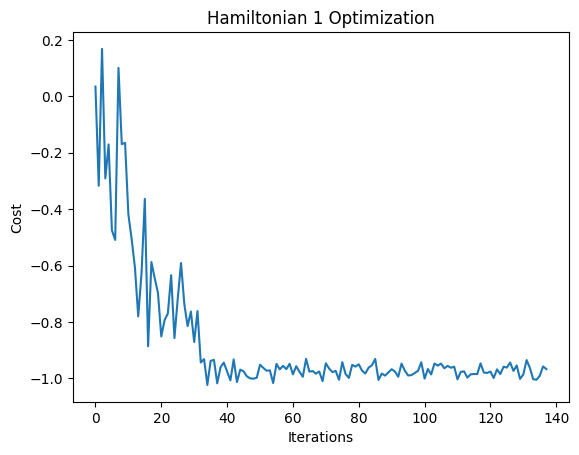

In [103]:
fig, ax = plt.subplots()
ax.plot(range(cost_history_dict["iters"]), cost_history_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.title("Hamiltonian 1 Optimization")
plt.draw()

In [104]:
cost_history_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

res = minimize(
    cost_func,
    x0,
    args=(ansatz_isa2, hamiltonian_isa2, estimator),
    method='COBYLA'
)

Iters. done: 1 [Current cost: 0.06200582416691595]
Iters. done: 2 [Current cost: 0.27010669727927084]
Iters. done: 3 [Current cost: -0.14596353636689027]
Iters. done: 4 [Current cost: -0.06375439243828734]
Iters. done: 5 [Current cost: -0.4719421673207543]
Iters. done: 6 [Current cost: -0.398868670858591]
Iters. done: 7 [Current cost: -0.21908619113423167]
Iters. done: 8 [Current cost: -0.7607601315937916]
Iters. done: 9 [Current cost: -0.4874976075262493]
Iters. done: 10 [Current cost: -0.5663767659598333]
Iters. done: 11 [Current cost: -0.212901123938128]
Iters. done: 12 [Current cost: -0.70296222006149]
Iters. done: 13 [Current cost: -0.4203004060584123]
Iters. done: 14 [Current cost: -0.18167013775345617]
Iters. done: 15 [Current cost: -0.4714712684245669]
Iters. done: 16 [Current cost: -0.7264982773478317]
Iters. done: 17 [Current cost: -0.5736080571450727]
Iters. done: 18 [Current cost: -0.7946101890573151]
Iters. done: 19 [Current cost: -0.8032454276340579]
Iters. done: 20 [Curr

In [105]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -1.0561020212092174
       x: [ 5.873e+00  2.396e+00 ...  1.343e+00  3.618e+00]
    nfev: 144
   maxcv: 0.0

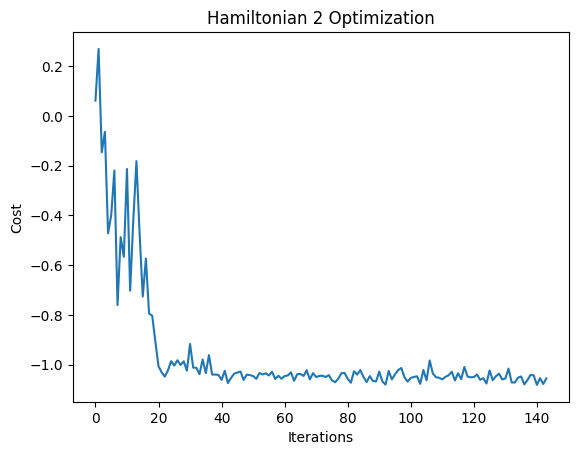

In [106]:
fig, ax = plt.subplots()
ax.plot(range(cost_history_dict["iters"]), cost_history_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.title("Hamiltonian 2 Optimization")
plt.draw()

In [107]:
cost_history_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

res = minimize(
    cost_func,
    x0,
    args=(ansatz_isa3, hamiltonian_isa3, estimator),
    method='COBYLA'
)

Iters. done: 1 [Current cost: -0.3544802647347663]
Iters. done: 2 [Current cost: -1.1020723972748825]
Iters. done: 3 [Current cost: -0.523686297314659]
Iters. done: 4 [Current cost: -1.0803181995582172]
Iters. done: 5 [Current cost: -0.31387141366332083]
Iters. done: 6 [Current cost: -1.1269608342767183]
Iters. done: 7 [Current cost: -0.8916188857427604]
Iters. done: 8 [Current cost: -0.2403128443594974]
Iters. done: 9 [Current cost: -0.9098927272690671]
Iters. done: 10 [Current cost: -0.4814815816342436]
Iters. done: 11 [Current cost: -0.6359558514221684]
Iters. done: 12 [Current cost: -1.4105601817096514]
Iters. done: 13 [Current cost: -1.4206283995737017]
Iters. done: 14 [Current cost: -1.5263418899247547]
Iters. done: 15 [Current cost: -0.7227235844034903]
Iters. done: 16 [Current cost: -0.6435287260887983]
Iters. done: 17 [Current cost: -1.064877345196786]
Iters. done: 18 [Current cost: -1.2392808781158577]
Iters. done: 19 [Current cost: -1.0448542119247453]
Iters. done: 20 [Curre

In [108]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -1.7575354862176495
       x: [ 6.489e+00  1.302e+00 ...  1.224e+00  3.777e+00]
    nfev: 143
   maxcv: 0.0

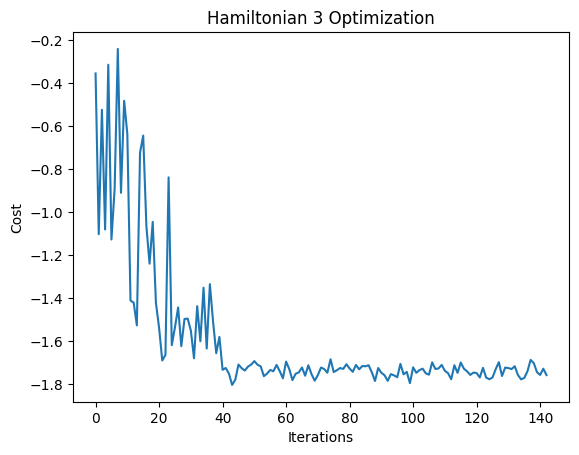

In [109]:
fig, ax = plt.subplots()
ax.plot(range(cost_history_dict["iters"]), cost_history_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.title("Hamiltonian 3 Optimization")
plt.draw()

In [110]:
cost_history_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

res = minimize(
    cost_func,
    x0,
    args=(ansatz_isa4, hamiltonian_isa4, estimator),
    method='COBYLA'
)

Iters. done: 1 [Current cost: 0.3883013141784778]
Iters. done: 2 [Current cost: 1.1540461349904825]
Iters. done: 3 [Current cost: -0.28791619512853894]
Iters. done: 4 [Current cost: 0.054069210800680056]
Iters. done: 5 [Current cost: -0.5312374469194432]
Iters. done: 6 [Current cost: -0.5862539014858649]
Iters. done: 7 [Current cost: 0.1514536306124573]
Iters. done: 8 [Current cost: -1.816969128008318]
Iters. done: 9 [Current cost: -1.3174026442197517]
Iters. done: 10 [Current cost: -1.5987557487202557]
Iters. done: 11 [Current cost: -1.0746353823393362]
Iters. done: 12 [Current cost: -0.5472378305362546]
Iters. done: 13 [Current cost: -1.1552260334983653]
Iters. done: 14 [Current cost: -1.2163579372780187]
Iters. done: 15 [Current cost: -1.7957651769478038]
Iters. done: 16 [Current cost: -0.3663198822448215]
Iters. done: 17 [Current cost: 0.10302525226542525]
Iters. done: 18 [Current cost: -1.5235932353913046]
Iters. done: 19 [Current cost: -1.4011841767708675]
Iters. done: 20 [Curren

In [111]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -2.82664513846047
       x: [ 5.782e+00  2.738e+00 ...  1.258e+00  3.282e+00]
    nfev: 159
   maxcv: 0.0

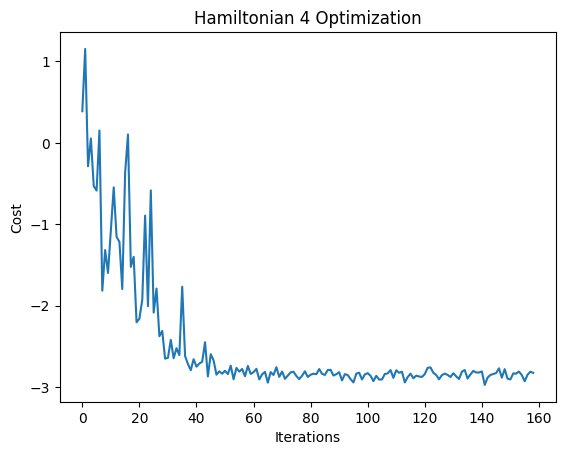

In [112]:
fig, ax = plt.subplots()
ax.plot(range(cost_history_dict["iters"]), cost_history_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.title("Hamiltonian 4 Optimization")
plt.draw()

In [113]:
cost_history_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

res = minimize(
    cost_func,
    x0,
    args=(ansatz_isa5, hamiltonian_isa5, estimator),
    method='COBYLA'
)

Iters. done: 1 [Current cost: -0.6074512895820878]


Iters. done: 2 [Current cost: -3.4686862254003032]
Iters. done: 3 [Current cost: 4.379988591918933]
Iters. done: 4 [Current cost: -2.0773105538200705]
Iters. done: 5 [Current cost: 3.1916813781312654]
Iters. done: 6 [Current cost: -6.045070858186168]
Iters. done: 7 [Current cost: -5.231895275770965]
Iters. done: 8 [Current cost: 0.24553188591151348]
Iters. done: 9 [Current cost: -4.189970008350019]
Iters. done: 10 [Current cost: -1.6256885342259935]
Iters. done: 11 [Current cost: -1.1173009491908288]
Iters. done: 12 [Current cost: -6.99788679033361]
Iters. done: 13 [Current cost: -6.8140012530661]
Iters. done: 14 [Current cost: -10.55759683542911]
Iters. done: 15 [Current cost: -6.436379155653752]
Iters. done: 16 [Current cost: -8.58201125772782]
Iters. done: 17 [Current cost: -7.164068615560713]
Iters. done: 18 [Current cost: -8.991246375535864]
Iters. done: 19 [Current cost: -11.183596547177046]
Iters. done: 20 [Current cost: -11.932496703525322]
Iters. done: 21 [Current cost: -11.7

In [114]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -15.193408169330782
       x: [ 7.253e+00  2.083e+00 ...  1.340e+00  4.169e+00]
    nfev: 157
   maxcv: 0.0

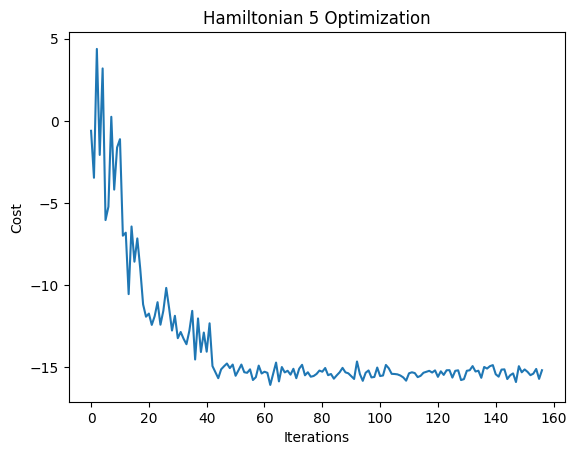

In [115]:
fig, ax = plt.subplots()
ax.plot(range(cost_history_dict["iters"]), cost_history_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.title("Hamiltonian 5 Optimization")
plt.draw()